## Задача №4

In [142]:
import numpy as np
import pandas
from matplotlib import pyplot
from sklearn.decomposition import PCA
import scipy as sp
from sklearn.manifold import TSNE
from scipy.optimize import minimize_scalar
#%pylab inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Задача минимизации: $\ f(x) = (x_1 − 1)^2 + 2(x_1^2 − x_2 − 1)^2 → \underset{x}{min}$

In [108]:
def f(x):
    return (x[0] - 1) ** 2 + 2 * (x[0] ** 2 - x[1] - 1) ** 2

#### Нарисуем некоторые линии уровня этой фукнции:

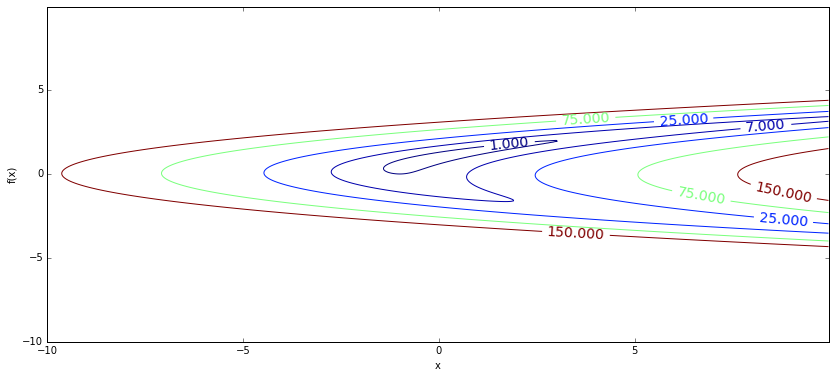

In [8]:
grid = np.mgrid[-10:10:0.05, -10:10:0.05]
density = np.array([[f((grid[0, i, j], grid[1, i, j]))
                       for i in range(grid[0].shape[0])]
                      for j in range(grid[0].shape[1])])

pyplot.figure(figsize=(14, 6))

CS = plt.contour(grid[0], grid[1], density, [1.0, 7.0, 25, 75, 150])
pyplot.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')

pyplot.xlabel('x')
pyplot.ylabel('f(x)')

pyplot.xlim((np.min(grid[0]), np.max(grid[0])))
pyplot.ylim((np.min(grid[1]), np.max(grid[1])))
    
pyplot.show()

### Реализация радиентного спуска:

In [109]:
def gradientF(x):
    return np.array([2 * (x[0] - 1) + 4 * (x[0] ** 2 - x[1] - 1) * 2 * x[0],
                     -4 * (x[0] ** 2 - x[1] - 1)])

In [110]:
def gradientDescent(f, gamma, x_begin, iteration_number, eps=0):
    visited_points = [x_begin]
    
    for i in range(iteration_number):
        visited_points.append(visited_points[i] - gamma(visited_points[i])
                              * gradientF(visited_points[i]))
        
        if abs(f(visited_points[i + 1]) - f(visited_points[i])) < eps:
            break
            
    return np.array(visited_points)

Запустим градиентный спуск из точки [-1.5, 1.5] на 1000 шагов с гамма-функцией, которая минимизирует значение функционала на следующем шаге:

In [111]:
def gamma(x):
    return minimize_scalar(lambda y: f(x - y * gradientF(x))).x

points_visited = gradientDescent(f, gamma, [-1.5, 1.5], 1000)
argmin = points_visited[len(points_visited) - 1]

Визуализируем полученную траекторию точки:

In [112]:
def showGradientSescent(points_visited, logscale=False):
    pyplot.plot(points_visited[:, 0], points_visited[:, 1], 'o-')
    
    pyplot.xlabel('Neighbours number')
    pyplot.ylabel('Accuracy')
    
    if logscale == True:
        pyplot.title('Gradient descent logscale')
        pyplot.yscale('log')
    else:
        pyplot.title('Gradient descent')

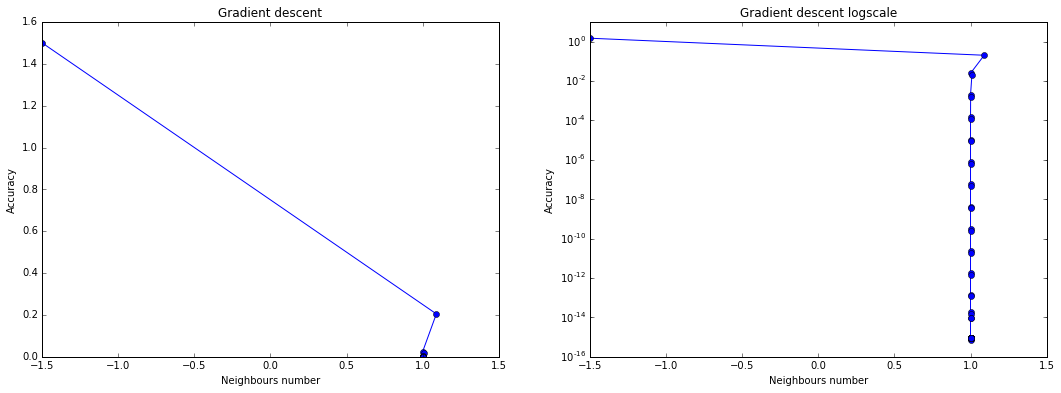

In [113]:
pyplot.figure(figsize=(18, 6))

pyplot.subplot(1, 2, 1)
showGradientSescent(points_visited, logscale=False)

pyplot.subplot(1, 2, 2)
showGradientSescent(points_visited, logscale=True)

pyplot.show()

### Реализация метода тяжелого шара

In [114]:
def heavyBall(f, alpha, gamma, x_begin, iteration_number, eps=0):
    visited_points = [x_begin]
    visited_points.append(x_begin - gamma(x_begin) * gradientF(x_begin))
    
    for i in range(1, iteration_number):
        visited_points.append(visited_points[i] 
                              + alpha(i) * (visited_points[i] - visited_points[i - 1])
                              - gamma(visited_points[i]) * gradientF(visited_points[i]))
        
        if abs(f(visited_points[i + 1]) - f(visited_points[i])) < eps:
            break 
                              
    return np.array(visited_points)

Запустим метод тяжелого шара из точки [-1.5, 1.5] на 1000 шагов с гамма-функцией, которая минимизирует значение функционала на следующем шаге:

In [115]:
def alpha(x):
    return 1.0 / x

points_visited = heavyBall(f, alpha, gamma, [-1.5, 1.5], 1000)
argmin = points_visited[len(points_visited) - 1]

Визуализируем полученную траекторию точки:

In [117]:
def showHeavyBall(points_visited):
    pyplot.plot(points_visited[:, 0], points_visited[:, 1], 'o-')
    
    pyplot.xlabel('x_1')
    pyplot.ylabel('x_2')
    
    pyplot.title('Heavy Ball')

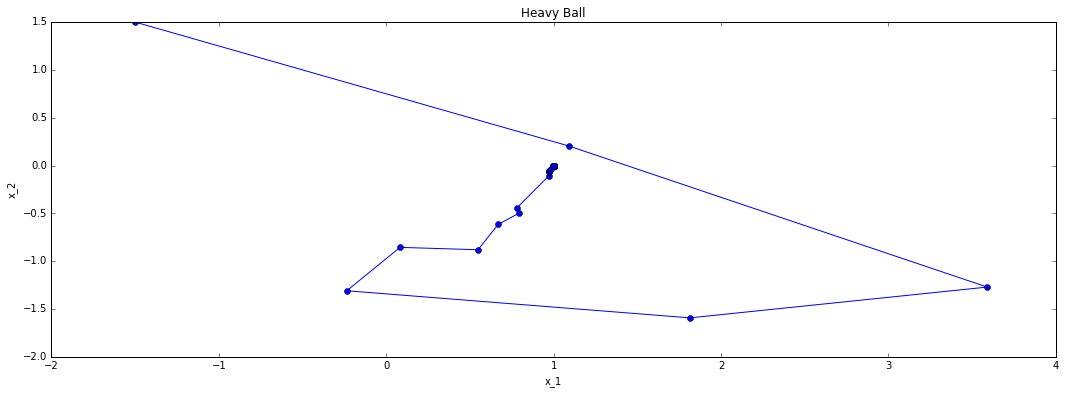

In [118]:
pyplot.figure(figsize=(18, 6))
showHeavyBall(points_visited)
pyplot.show()

### Подбор величины шага:

Подберем теперь оптимальную константу вместо функции gamma.
В качестве eps возьмем $0.1^8$ :

#### Метод градиентного спуска:

Для стандартной gamma-функции, которая минимизирует значение функционала на следующем шаге: 

In [119]:
points_visited = gradientDescent(f, gamma, [-1.5, 1.5], 1000, eps=0.1**8)
print 'Number of steps:', len(points_visited)
print 'Argmin:', points_visited[len(points_visited) - 1]
print 'Value at argmin:', f(points_visited[len(points_visited) - 1])

Number of steps: 9
Argmin: [  1.00000000e+00   1.05140282e-05]
Value at argmin: 2.21106904036e-10


Попробуем подобрать оптимальную константу, для этого переберем константы от 0.001 до 0.01099 с шагом 0.00001:

In [129]:
for i in range(1000):
    points_visited = gradientDescent(f, (lambda x: 0.001 + float(i) / 10000), [-1.5, 1.5], 1000, eps=0.1**8)
    print 'gamma =', 0.001 + float(i) / 100000
    print 'Number of steps:', len(points_visited)
    print 'Argmin:', points_visited[len(points_visited) - 1]
    print 'Value at argmin:', f(points_visited[len(points_visited) - 1])
    print

gamma = 0.001
Number of steps: 1001
Argmin: [-0.73847081 -0.05077201]
Value at argmin: 3.34853317315

gamma = 0.00101
Number of steps: 1001
Argmin: [-0.62198013 -0.21194101]
Value at argmin: 2.95274195495

gamma = 0.00102
Number of steps: 1001
Argmin: [-0.48770039 -0.37078951]
Value at argmin: 2.51957590951

gamma = 0.00103
Number of steps: 1001
Argmin: [-0.33121623 -0.52318034]
Value at argmin: 2.04168419236

gamma = 0.00104
Number of steps: 1001
Argmin: [-0.15038655 -0.66111219]
Value at argmin: 1.52344479233

gamma = 0.00105
Number of steps: 1001
Argmin: [ 0.04728108 -0.77129716]
Value at argmin: 1.01024825819

gamma = 0.00106
Number of steps: 1001
Argmin: [ 0.23636368 -0.83859618]
Value at argmin: 0.605416145094

gamma = 0.00107
Number of steps: 1001
Argmin: [ 0.38455773 -0.85784744]
Value at argmin: 0.378834901082

gamma = 0.00108
Number of steps: 1001
Argmin: [ 0.4819207  -0.84076946]
Value at argmin: 0.27906912993

gamma = 0.00109
Number of steps: 1001
Argmin: [ 0.54254598 -0.80

Как видно, из данной выборки оптимальная константа получилась gamma = 0.01018, при этом:

Number of steps: 207

Argmin: [  9.99653642e-01  -7.63190057e-04]

Value at argmin: 1.29930943186e-07

При этом количество шагов также получилолсь небольшим -- 207


Посмотрим, что будет при больших gamma. Gереберем константы от 0.1 до 0.19 с шагом 0.01:

In [135]:
for i in range(10):
    points_visited = gradientDescent(f, (lambda x: 0.1 + i * 0.01), [-1.5, 1.5], 1000, eps=0.1**8)
    print 'gamma =', 0.1 + i * 0.01
    print 'Number of steps:', len(points_visited)
    print 'Argmin:', points_visited[len(points_visited) - 1]
    print 'Value at argmin:', f(points_visited[len(points_visited) - 1])
    print 'First 10 visited points'
    for j in range(10):
        print points_visited[j]
    print

gamma = 0.1
Number of steps: 193
Argmin: [  9.99664408e-01  -7.34333409e-04]
Value at argmin: 1.20626117782e-07
First 10 visited points
[-1.5  1.5]
[-1.3  1.4]
[-1.5784  1.116 ]
[-0.58876239  1.26613862]
[-1.17511225  0.49833964]
[-0.85050413  0.4513593 ]
[-0.97573829  0.16015849]
[-0.7430263   0.07692118]
[-0.70639287 -0.13301206]
[-0.57307469 -0.28021088]

gamma = 0.11
Number of steps: 1001
Argmin: [ 0.99897279 -0.25437124]
Value at argmin: 0.12732967162
First 10 visited points
[-1.5  1.5]
[-1.28  1.39]
[-1.62500224  1.059296  ]
[-0.21618972  1.31508396]
[-0.38017389  0.31701174]
[-0.46879222 -0.19887926]
[-0.3854883  -0.45467528]
[-0.21526126 -0.62923362]
[-0.00936034 -0.77198237]
[ 0.21082146 -0.87227157]

gamma = 0.12
Number of steps: 1001
Argmin: [ 0.97184445 -0.35683012]
Value at argmin: 0.18237028106
First 10 visited points
[-1.5  1.5]
[-1.26  1.38]
[-1.67608704  0.999648  ]
[ 0.26888732  1.38826549]
[ 1.04217866  0.27660224]
[ 1.22261528  0.18517862]
[ 0.80579564  0.33379118]


Как видно, при gamma = 0.1 алгоритм еще не расходится, сходится за 193 шага. Начиная с gamma = 0.16 алгоритм точно расходится, уже на 10 итерации появляется значение координаты inf. При gamma $\in$ [0.11, 0.16) алгоритм, возможно, расходится, так как при этих значениях gamma функция gradientDescent отработала все 1000 шагов.

#### Метод тяжелого шара:

Для стандартной gamma-функции, которая минимизирует значение функционала на следующем шаге: 

In [137]:
points_visited = heavyBall(f, alpha, gamma, [-1.5, 1.5], 1000, eps=0.1**8)
print 'Number of steps:', len(points_visited)
print 'Argmin:', points_visited[len(points_visited) - 1]
print 'Value at argmin:', f(points_visited[len(points_visited) - 1])

Number of steps: 24
Argmin: [  1.00006088e+00   1.34751511e-04]
Value at argmin: 4.04375853115e-09


Так же, как в методе градиентного спуска, попробуем подобрать оптимальную константу, для этого переберем константы от 0.001 до 0.01099 с шагом 0.00001:

In [138]:
for i in range(1000):
    points_visited = heavyBall(f, alpha, (lambda x: 0.001 + float(i) / 10000), [-1.5, 1.5], 1000, eps=0.1**8)
    print 'gamma =', 0.001 + float(i) / 100000
    print 'Number of steps:', len(points_visited)
    print 'Argmin:', points_visited[len(points_visited) - 1]
    print 'Value at argmin:', f(points_visited[len(points_visited) - 1])
    print

gamma = 0.001
Number of steps: 1001
Argmin: [-0.72881817 -0.06499638]
Value at argmin: 3.31496587327

gamma = 0.00101
Number of steps: 1001
Argmin: [-0.60982123 -0.22747564]
Value at argmin: 2.91255310042

gamma = 0.00102
Number of steps: 1001
Argmin: [-0.47228376 -0.38729956]
Value at argmin: 2.47127135628

gamma = 0.00103
Number of steps: 1001
Argmin: [-0.31172865 -0.53990687]
Value at argmin: 1.98405154899

gamma = 0.00104
Number of steps: 1001
Argmin: [-0.1265938  -0.67651886]
Value at argmin: 1.45827093311

gamma = 0.00105
Number of steps: 1001
Argmin: [ 0.07350764 -0.78292018]
Value at argmin: 0.948001935132

gamma = 0.00106
Number of steps: 1001
Argmin: [ 0.26030077 -0.84411023]
Value at argmin: 0.562689900977

gamma = 0.00107
Number of steps: 1001
Argmin: [ 0.40219769 -0.85715148]
Value at argmin: 0.358083112417

gamma = 0.00108
Number of steps: 1001
Argmin: [ 0.49348765 -0.83595503]
Value at argmin: 0.269190518183

gamma = 0.00109
Number of steps: 1001
Argmin: [ 0.55038766 -0.

Здесь видно, что оптимальной константой из рассмотренного промежутка оказалась gamma = 0.01098:

Number of steps: 187

Argmin: [  9.99664802e-01  -7.24047096e-04]

Value at argmin: 1.18138619545e-07

Количество шагов также небольшое.

Посмотрим, что будет при больших константах:

In [141]:
for i in range(10):
    points_visited = heavyBall(f, alpha, (lambda x: 0.1 + i * 0.01), [-1.5, 1.5], 1000, eps=0.1**8)
    print 'gamma =', 0.1 + i * 0.01
    print 'Number of steps:', len(points_visited)
    print 'Argmin:', points_visited[len(points_visited) - 1]
    print 'Value at argmin:', f(points_visited[len(points_visited) - 1])
    print 'First 10 visited points'
    for j in range(10):
        print points_visited[j]
    print

gamma = 0.1
Number of steps: 188
Argmin: [  9.99662907e-01  -7.42867431e-04]
Value at argmin: 1.23097223477e-07
First 10 visited points
[-1.5  1.5]
[-1.3  1.4]
[-1.3784  1.016 ]
[-1.06985034  0.77759462]
[-1.09481533  0.44492022]
[-0.89781558  0.26323177]
[-0.80720806  0.0440305 ]
[-0.68409343 -0.1494813 ]
[-0.53903861 -0.3301398 ]
[-0.37666387 -0.50444114]

gamma = 0.11
Number of steps: 1001
Argmin: [ 0.99927028 -0.25313354]
Value at argmin: 0.126680782573
First 10 visited points
[-1.5  1.5]
[-1.28  1.39]
[-1.40500224  0.949296  ]
[-0.9078201   0.73982753]
[-1.05390043  0.26710102]
[-0.78360812  0.08010563]
[-0.65854199 -0.16236158]
[-0.50692056 -0.38051557]
[-0.31545262 -0.57118745]
[-0.09353328 -0.7399144 ]

gamma = 0.12
Number of steps: 1001
Argmin: [ 0.97217499 -0.35570215]
Value at argmin: 0.181767233298
First 10 visited points
[-1.5  1.5]
[-1.26  1.38]
[-1.43608704  0.879648  ]
[-0.68759427  0.71716703]
[-0.85447823  0.06570376]
[-0.7263928 -0.258236 ]
[-0.43575351 -0.42580036]


Здесь метод точно расходится при gamma = 0.19 и сходится при gamma = 0.1. Между -- непонятно, но количество шагов большое -- $\geqslant$ 1000